## Antes de Tudo: Instalação do Anaconda e Configuração para o Qiskit

Para seguir as orientações da documentação do Qiskit, vamos instalar o Anaconda. Neste exemplo, utilizaremos o **Miniconda**, mas o processo é similar para o Anaconda completo. Ambos funcionam perfeitamente para nosso propósito.

### Linux

#### 1. Instalação
- Acesse o site do [Anaconda](https://www.anaconda.com/) e baixe a versão do **Anaconda** ou **Miniconda** que preferir.

#### 2. Configuração
Após instalar o Anaconda, vamos configurar o ambiente virtual necessário. Siga os passos abaixo no diretório do seu projeto:

- **Criando o Ambiente Virtual:**
  ```bash
  conda create -n nome_do_env
  ```
  Aqui, `nome_do_env` é o nome que você deseja dar ao seu ambiente.

- **Ativando o Ambiente:**
  ```bash
  conda activate nome_do_env
  ```
  Isso ativará o ambiente criado para que possamos instalar pacotes e trabalhar isoladamente.

#### 3. Possíveis Erros
Durante a instalação do Anaconda, você pode receber uma mensagem de "comando não encontrado" ao tentar usar `conda`. Isso ocorre quando o diretório do Anaconda não foi adicionado ao **PATH** do sistema.

Para resolver, siga as etapas abaixo:

- **Adicionar o Anaconda ao PATH Manualmente:**
  - Primeiro, abra o arquivo de configuração do Bash para editar:
    ```bash
    nano ~/.bashrc
    ```
  - Em seguida, adicione a linha abaixo ao final do arquivo para incluir o Anaconda no PATH:
    ```bash
    export PATH="~/anaconda3/bin:$PATH"
    ```
    > Substitua `~/anaconda3` pelo diretório correto onde o Anaconda foi instalado. Por exemplo, se você instalou o **Miniconda**, substitua por `~/miniconda3`.
    > Caso a sua versão seja outra, substitua o nome 'miniconda3' pela sua versão

- **Atualizar o Bash:**
  - Após editar o arquivo, você precisará atualizar o terminal para aplicar as mudanças:
    ```bash
    source ~/.bashrc
    ```

- **Reinicie o Terminal:**
  - Depois de atualizar o `.bashrc`, feche e reabra o terminal para garantir que as configurações foram aplicadas.

Agora, você deve conseguir usar o comando `conda` normalmente e seguir com a instalação e configuração do Qiskit.

## Instalação e Configuração do Qiskit
1. Baixe o pacote pip
```bash
conda install pip
```
2. Baixe o Qiskit
```bash
pip install qiskit
```
3. Instale o Qiskit runtime 
```bash
pip install qiskit_ibm_runtime
```

4. Instale o Qiskit aer
```bash
pip install qiskit_aer
```

5. selecione a Kernel da sua maquina virtual no notebook




In [1]:
import qiskit

In [ ]:
qiskit.__version__

: 

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Parametros da função 'QiskitRuntimeService'
# channel -> especifica qual canal de serviço está sendo utilizado, No caso, 'ibm_quantum' significa que você está se conectando ao IBM Quantum, o serviço de computação quântica em nuvem da IBM.
# token -> seu token de acesso 

token_str = 'ec220acfeee06d8e24e4d517e079fa222d241ea553eb3c34eb4630016a86190ea0bca5182aaae507c8ddf5042b3437ee5b8c3dc7b2feeb8cf0f4f662637ccf28'
service = QiskitRuntimeService(channel='ibm_quantum', # clound ibm
                               token=token_str)



: 

In [8]:
# Conectando ao backend do computador em especifico

backend = service.backend(name= "ibm_brisbane")

In [9]:

# Verificar propriedades
print(f"Número de qubits: {backend.num_qubits}")
print(f"Nome do backend: {backend.name}")

# Status do backend
status = backend.status()
print(f"Está operacional? {status.operational}")
print(f"Jobs em fila: {status.pending_jobs}")

# Configurações do backend
config = backend.configuration()
print(f"Número máximo de shots: {config.max_shots}")
print(f"Simulador? {config.simulator}")


Número de qubits: 127
Nome do backend: ibm_brisbane
Está operacional? True
Jobs em fila: 44
Número máximo de shots: 100000
Simulador? False


## Hello world - Qiskit

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)  # Cria um circuito quântico com 2 qubits

qc.h(0)  # Aplica a porta de Hadamard no qubit 0, colocando-o em uma superposição
qc.cx(0, 1)  # Aplica a porta CNOT (Controlled-X) entre o qubit 0 (controle) e o qubit 1 (alvo), criando emaranhamento

qc.draw(output='mpl')  # Desenha o circuito em formato gráfico (matplotlib)


MissingOptionalLibraryError: "The 'matplotlib' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install matplotlib'."


### Explicação dos Componentes:

1. **Importando Qiskit e Criando um Circuito Quântico**
   - **`QuantumCircuit(2)`**: Cria um circuito quântico com **2 qubits**.
   - Um **qubit** é a menor unidade de informação quântica e pode estar em estados 0, 1 ou uma **superposição** de ambos.

2. **Aplicando Portas Quânticas**
   - **`qc.cx(0, 1)`**: Aplica uma **porta CNOT (Controlled-NOT)** entre os qubits **0 e 1**.
   - A **porta CNOT** é uma porta de dois qubits. Ela usa o **qubit 0 como controle** e o **qubit 1 como alvo**. Se o qubit de controle (`q0`) estiver no estado `|1⟩`, a porta **inverte** o estado do qubit alvo (`q1`). Se `q0` estiver no estado `|0⟩`, `q1` permanece inalterado. Essa porta é muito importante para criar **emaranhamento** entre qubits, uma propriedade fundamental nos algoritmos quânticos.

3. **Desenhando o Circuito**
   - **`qc.draw(output='mpl')`**: Gera um diagrama visual do circuito quântico usando a biblioteca **matplotlib**.
   - Isso permite visualizar como as portas foram aplicadas ao longo do circuito e entender a estrutura geral do mesmo.

### Resumindo o Circuito

- Primeiro, um circuito quântico é criado com **2 qubits**.
- Em seguida, uma **porta Hadamard** é aplicada ao **qubit 0** para colocá-lo em um estado de superposição.
- Depois, uma **porta CNOT** é aplicada, com o **qubit 0 como controle** e o **qubit 1 como alvo**, o que cria um **estado emaranhado** entre eles.
- O diagrama final é desenhado para visualização.

Esse circuito simples é usado frequentemente como um exemplo de como criar um estado **Bell**, que é um tipo de estado emaranhado básico que serve como base para muitos algoritmos quânticos. 


# Operadores de Pauli
### 1. **Pauli-X (`X`)**
- **Função**: Atua como uma **porta NOT quântica**, ou seja, **inverte o estado do qubit**.
  - Se o qubit estiver em `|0⟩`, ele será mudado para `|1⟩`.
  - Se o qubit estiver em `|1⟩`, ele será mudado para `|0⟩`.
- **Usos Comuns**: Serve para **trocar** o estado do qubit e é equivalente ao NOT clássico.

### 2. **Pauli-Z (`Z`)**
- **Função**: Aplica uma **mudança de fase** ao qubit, invertendo a fase do estado `|1⟩`.
  - O estado `|0⟩` permanece o mesmo (`|0⟩`).
  - O estado `|1⟩` se torna `-|1⟩`.
- **Usos Comuns**: É usada para **alterar a fase** do estado quântico, sendo muito importante em **operações de controle** e **emaranhamento**.
A **identidade** (`I`) é outro operador fundamental na **computação quântica**, que atua de uma maneira especial em qubits.

### 3. **Operador de Identidade (`I`)**
- **Função**: A **identidade (`I`)** é um operador que **não faz nenhuma mudança** no estado do qubit. Em outras palavras, ela **mantém o qubit como está**, sem alterar sua amplitude ou fase.
- **Matriz**: A matriz de identidade é dada por:
  \[
  I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
  \]
  Ela simplesmente mantém o estado original do qubit.

-  **Usos Comuns da Identidade** 
- - é usada para aplicar **nenhuma Transformação**, ou seja, o estado do qubit não se altera
- - Ao realizar operações em sistemas de **múltiplos qubits**, o operador `I` é frequentemente usado para indicar que um qubit não deve ser alterado enquanto operações são aplicadas em outros qubits. Por exemplo, em um operador combinado, `IX` significaria aplicar a **identidade (`I`)** no primeiro qubit (mantê-lo inalterado) e o **Pauli-X (`X`)** no segundo qubit (inverter seu estado).

### Resumindo
- **Pauli-X (`X`)**: Funciona como uma porta NOT, **inverte o estado do qubit**.
- **Pauli-Z (`Z`)**: **Inverte a fase** do estado `|1⟩`, útil para operações que manipulam a **fase do qubit**.
- O **operador identidade (`I`)** não altera o estado do qubit.

In [15]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZZ")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ,ZI,IZ,XX,XI,IX]

In [16]:
from qiskit_aer.primitives import Estimator

estimator = Estimator() # cria uma instância da classe Estimator, que permite realizar estimativas de expectativa de diferentes observáveis para um dado circuito.

job = estimator.run([qc] * len(observables), observables) # Cria uma lista que contém o circuito quântico qc repetido tantas vezes quanto o número de observáveis. Isso significa que cada um dos observáveis será aplicado ao mesmo circuito.

job.result()

EstimatorResult(values=array([1.        , 1.        , 0.02929688, 1.        , 0.00195312,
       0.00195312]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0056077, 'sample_measure_time': 0.0021515, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16320, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0056077, 'sample_measure_time': 0.0021515, 'input_qubit_map'

# Pós-processamento e plotagem dos dados

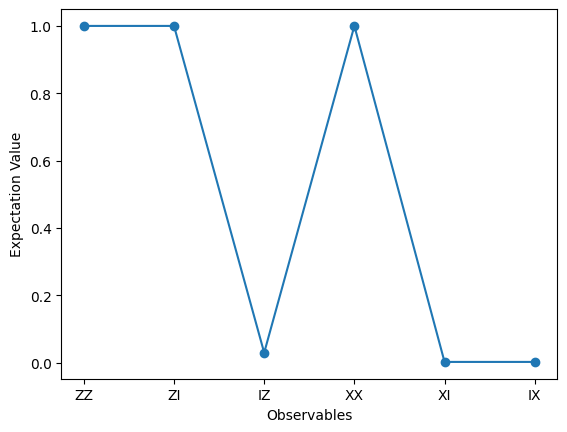

In [17]:
import matplotlib.pyplot as plt

data = ['ZZ','ZI','IZ','XX','XI','IX']
values = job.result()

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Value')
plt.show()


O gráfico mostra o valor esperado do observável definido pelo operador de Pauli, após aplicar o circuito quântico ao estado inicial.

# Estendendo o Hello World para $n$-qubit

In [40]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(8) # porta h no q8
    for i in range (n-1):
        qc.cx(i, i+1) # # faz a conexão (porta CNOT) a cada qubit
    return qc
n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)
# qc.draw(output='mpl')

In [41]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I'*(n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))
operators = [SparsePauliOp(operator_strings) for operator_string in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

Este código tem como objetivo criar uma lista de **operadores de Pauli** aplicados a um sistema de `n` qubits, focando em operadores que envolvem dois qubits específicos enquanto os demais recebem a identidade (`I`). Esses operadores são usados para medir **correlações** entre qubits em um circuito quântico. Eles são importantes em análises como o **emaranhamento**, que está na base de muitos algoritmos quânticos, e para entender como os qubits interagem uns com os outros.

Em termos de **ruído**, o código pode ajudar a caracterizar e analisar os efeitos do **ruído em múltiplos qubits**. Sistemas quânticos reais são muito suscetíveis ao ruído, que pode causar **decoerência** (perda de coerência dos estados) e **erros de fase** nos qubits. Os operadores de Pauli, como `Z` aplicados em pares de qubits, são ferramentas úteis para identificar como o ruído está afetando esses qubits, especialmente em casos onde o ruído não é uniforme, mas afeta múltiplos qubits de maneira correlacionada.

Assim, este código pode ser usado para medir **valores esperados** desses operadores de Pauli, o que permite avaliar a qualidade do **estado quântico** e a **presença de ruído**. Se houver uma discrepância significativa nos valores medidos, isso pode indicar que os qubits estão sendo afetados por ruído, e isso pode ajudar na aplicação de técnicas de **mitigação de erros** para melhorar a qualidade dos cálculos quânticos. 

Portanto, o uso dos operadores `Z` em pares de qubits é uma maneira de **detectar correlações indesejadas causadas pelo ruído**, ajudando a **avaliar a confiabilidade do sistema** e **melhorar sua precisão**. Isso é especialmente útil em algoritmos como o **Variational Quantum Eigensolver (VQE)**, onde precisamos de medidas precisas de observáveis para obter bons resultados.

## Procura o backend menos ocupado que possua pelo menos 100 qubits (exemplo que estou usando)

In [43]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
 
# If you did not previously save your credentials, use the following line instead:
# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True, min_num_qubits=100)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
 
qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

## Caso não seja necessário executar o código acima, e o sistema seja um pouco mais simples, pode-se executar o código abaixo:

In [22]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = 'ibm_brisbane'
backend = service.backend(name= "ibm_brisbane")
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

### Objetivo Geral do Código

O código faz o seguinte:

1. **Configura o Serviço IBM Quantum** para acessar um backend específico.
2. **Gera um Pass Manager (Gerenciador de Passes)** para otimizar o circuito.
3. **Transpila o Circuito** utilizando o `Pass Manager` criado, adaptando o circuito para o backend escolhido.
4. **Aplica um Layout** dos operadores de Pauli ao circuito transpilado, garantindo que os observáveis se alinhem corretamente com o circuito transpilado.

### Detalhes do Código

1. **Importando as Bibliotecas Necessárias**
   ```python
   from qiskit_ibm_runtime import QiskitRuntimeService
   from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
   ```
   - **`QiskitRuntimeService`**: Esta classe é usada para interagir com a **plataforma IBM Quantum**. Ela permite enviar jobs para backends quânticos e acompanhar os resultados.
   - **`generate_preset_pass_manager`**: Esta função cria um **Pass Manager**, que é uma ferramenta para **transpilar (otimizar e ajustar)** circuitos quânticos para um backend específico. A transpilação adapta o circuito para as restrições e características específicas do hardware.

2. **Definindo o Backend do IBM Quantum**
   ```python
   backend_name = 'ibm_brisbane'
   backend = service.backend(name="ibm_brisbane")
   ```
   - **`backend_name`**: Aqui estamos definindo o nome do backend quântico (`ibm_brisbane`). Este é um dos processadores quânticos reais disponíveis no IBM Quantum.
   - **`backend = service.backend(name="ibm_brisbane")`**: A linha acessa o backend (`ibm_brisbane`) usando o `service`. O backend pode ser um dispositivo real da IBM ou um simulador.

3. **Gerando o Pass Manager (Gerenciador de Passes)**
   ```python
   pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
   ```
   - **`generate_preset_pass_manager(optimization_level=1, backend=backend)`**: Esta função gera um **Pass Manager** para transpilação do circuito.
   - **`optimization_level=1`**: Define o nível de **otimização** que será aplicado ao circuito.
     - O nível `1` indica uma **otimização leve**, que busca reduzir a profundidade do circuito e a quantidade de portas, mas sem alterar substancialmente a estrutura do circuito. Existem níveis de `0` a `3`, onde `0` aplica pouca ou nenhuma otimização e `3` aplica otimizações intensivas.
   - **`backend=backend`**: O Pass Manager é criado para ser compatível com o backend especificado (`ibm_brisbane`). Isso garante que a transpilação seja adequada ao conjunto de portas e limitações do hardware.

4. **Transpilando o Circuito**
   ```python
   qc_transpiled = pass_manager.run(qc)
   ```
   - **`qc_transpiled = pass_manager.run(qc)`**: Executa a transpilação do circuito `qc` usando o `Pass Manager` gerado.
   - A **transpilação** adapta o circuito ao backend, garantindo que ele utilize apenas portas suportadas pelo hardware e otimiza a disposição das portas para minimizar a **profundidade** (quantidade de operações em sequência) e **tempo de execução**, melhorando a **fidelidade** do circuito quando executado no hardware.

5. **Aplicando o Layout aos Operadores**
   ```python
   operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]
   ```
   - **`operators_transpiled_list`**: Cria uma lista de **operadores transpilados** aplicando o layout do circuito transpilado.
   - **`op.apply_layout(qc_transpiled.layout)`**: Para cada operador `op` na lista `operators`, o layout resultante da transpilação do circuito (`qc_transpiled.layout`) é aplicado ao operador. Isso garante que o operador de Pauli esteja **mapeado corretamente** aos qubits físicos após a transpilação.
   - Isso é importante porque a **transpilação** geralmente muda a **atribuição dos qubits físicos**, e é essencial garantir que os operadores ainda sejam aplicados aos qubits corretos no circuito.

### Motivação para o Código

1. **Adaptação ao Hardware Real**:
   - Em **backends quânticos reais**, como o `ibm_brisbane`, os qubits têm limitações específicas, e nem todos os pares de qubits estão diretamente conectados. Além disso, existem **erros físicos** e **decoerência**, que afetam os resultados se o circuito não for otimizado.
   - O **Pass Manager** é responsável por adaptar e **otimizar** o circuito para o backend, minimizando **ruídos e erros**.

2. **Mitigação de Ruído**:
   - A transpilação otimiza o circuito em termos de **quantidade de portas** e **conexões entre qubits**, o que é essencial para reduzir os efeitos do **ruído** no sistema. Um circuito com menor profundidade tem menos probabilidade de ser afetado pelo ruído, pois passa menos tempo em execução.
   - Aplicar o layout aos **operadores** após a transpilação garante que as medições sejam feitas nos **qubits corretos**, preservando a precisão dos resultados.

3. **Eficiência de Execução**:
   - Executar circuitos em hardware quântico envolve **limitações físicas**, como qubits conectados e fidelidade das operações. O **Pass Manager** tenta garantir que o circuito seja executado da forma mais eficiente possível, reduzindo a quantidade de operações necessárias e usando apenas portas suportadas pelo backend específico.

### Resumo

Este código conecta-se a um backend da IBM Quantum, gera um **Pass Manager** para otimizar um circuito quântico e **transpila o circuito** para torná-lo adequado ao backend real. Em seguida, ajusta os **operadores de Pauli** aos qubits reais, de acordo com o mapeamento realizado durante a transpilação. A principal motivação é adaptar o circuito para o hardware, **reduzir o ruído** e **melhorar a eficiência** da execução no backend real, o que é crucial para obter bons resultados em **computação quântica prática**.

# Executando no Backend

In [45]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'

estimator = Estimator(backend, options=options) # Create an Estimator object


In [46]:
# Submit the circuit to Estimator
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

cw68200xa9wg008wbpw0


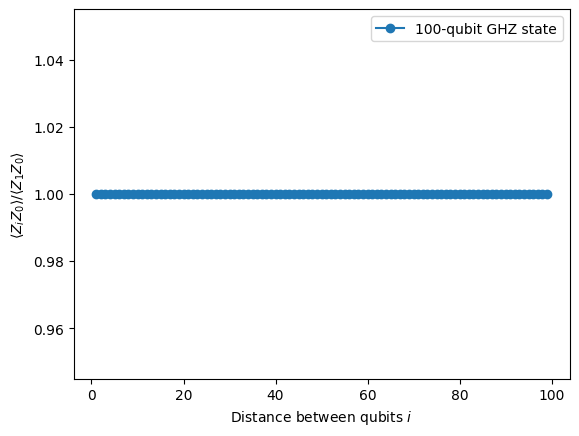

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit_ibm_runtime import QiskitRuntimeService
 
# data
data = list(range(1, len(operators)+1)) # Distance between the Z operators
result = job.result()[0]
values = result.data.evs # Expectation value at each Z operator.
values = [v / values[0] for v in values] # Normalize the expectation values to evaluate how they decay with distance.
 
# plotting graph
plt.plot(data, values, marker='o', label='100-qubit GHZ state')
plt.xlabel('Distance between qubits $i$')
plt.ylabel(r'$\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $')
plt.legend()
plt.show()

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='ec220acfeee06d8e24e4d517e079fa222d241ea553eb3c34eb4630016a86190ea0bca5182aaae507c8ddf5042b3437ee5b8c3dc7b2feeb8cf0f4f662637ccf28'
)
job = service.job('cw68200xa9wg008wbpw0')
job_result = job.result()

for idx, pub_result in enumerate(job_result):
    print(f"Expectation values for pub {idx}: {pub_result.data.evs}")

Expectation values for pub 0: [0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099 0.06971099
 0.06971099 0.06971099 0.0697109

# Código para procurar o backend com menos fila

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum')
backends = service.backends()

# Obter o tempo de fila para cada backend disponível e armazenar em uma lista de tuplas
backend_queue_times = []
for backend in backends:
    queue_time = backend.status().pending_jobs  # Número de jobs pendentes na fila
    backend_queue_times.append((backend.name, queue_time))

# Ordenar os backends pelo tempo de fila (número de jobs pendentes)
sorted_backends = sorted(backend_queue_times, key=lambda x: x[1])

# Imprimir a lista ordenada dos backends e seus respectivos tempos de fila
print("Lista de backends disponíveis ordenada pelo menor tempo de fila:")
for backend_name, queue_time in sorted_backends:
    print(f"{backend_name}: {queue_time} jobs na fila")


Lista de backends disponíveis ordenada pelo menor tempo de fila:
ibm_brisbane: 43 jobs na fila
ibm_sherbrooke: 118 jobs na fila
ibm_kyiv: 530 jobs na fila
